In [45]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 

import statsmodels.formula.api as smf
from sklearn.metrics import r2_score,

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns


import pickle

In [9]:
data =pd.read_csv('Admission_Prediction.csv')


In [10]:
# checkgin first 5 row from the dataset
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [11]:
data.shape

(500, 9)

In [12]:
#printing the summry of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [13]:
#finding the count of missing value from diffrent column

data.isnull()  #finding the count of missing value form of true and false in column

data.isnull().sum()  #finding the count of missing value from diffrent column

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [14]:
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean()) ## fill na with mean avrage og GRE score
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean()) ## fill na with mean avrage og GRE score
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])

## fill na with mode most occrance value in University Rating if multiple mode is treir slect index too

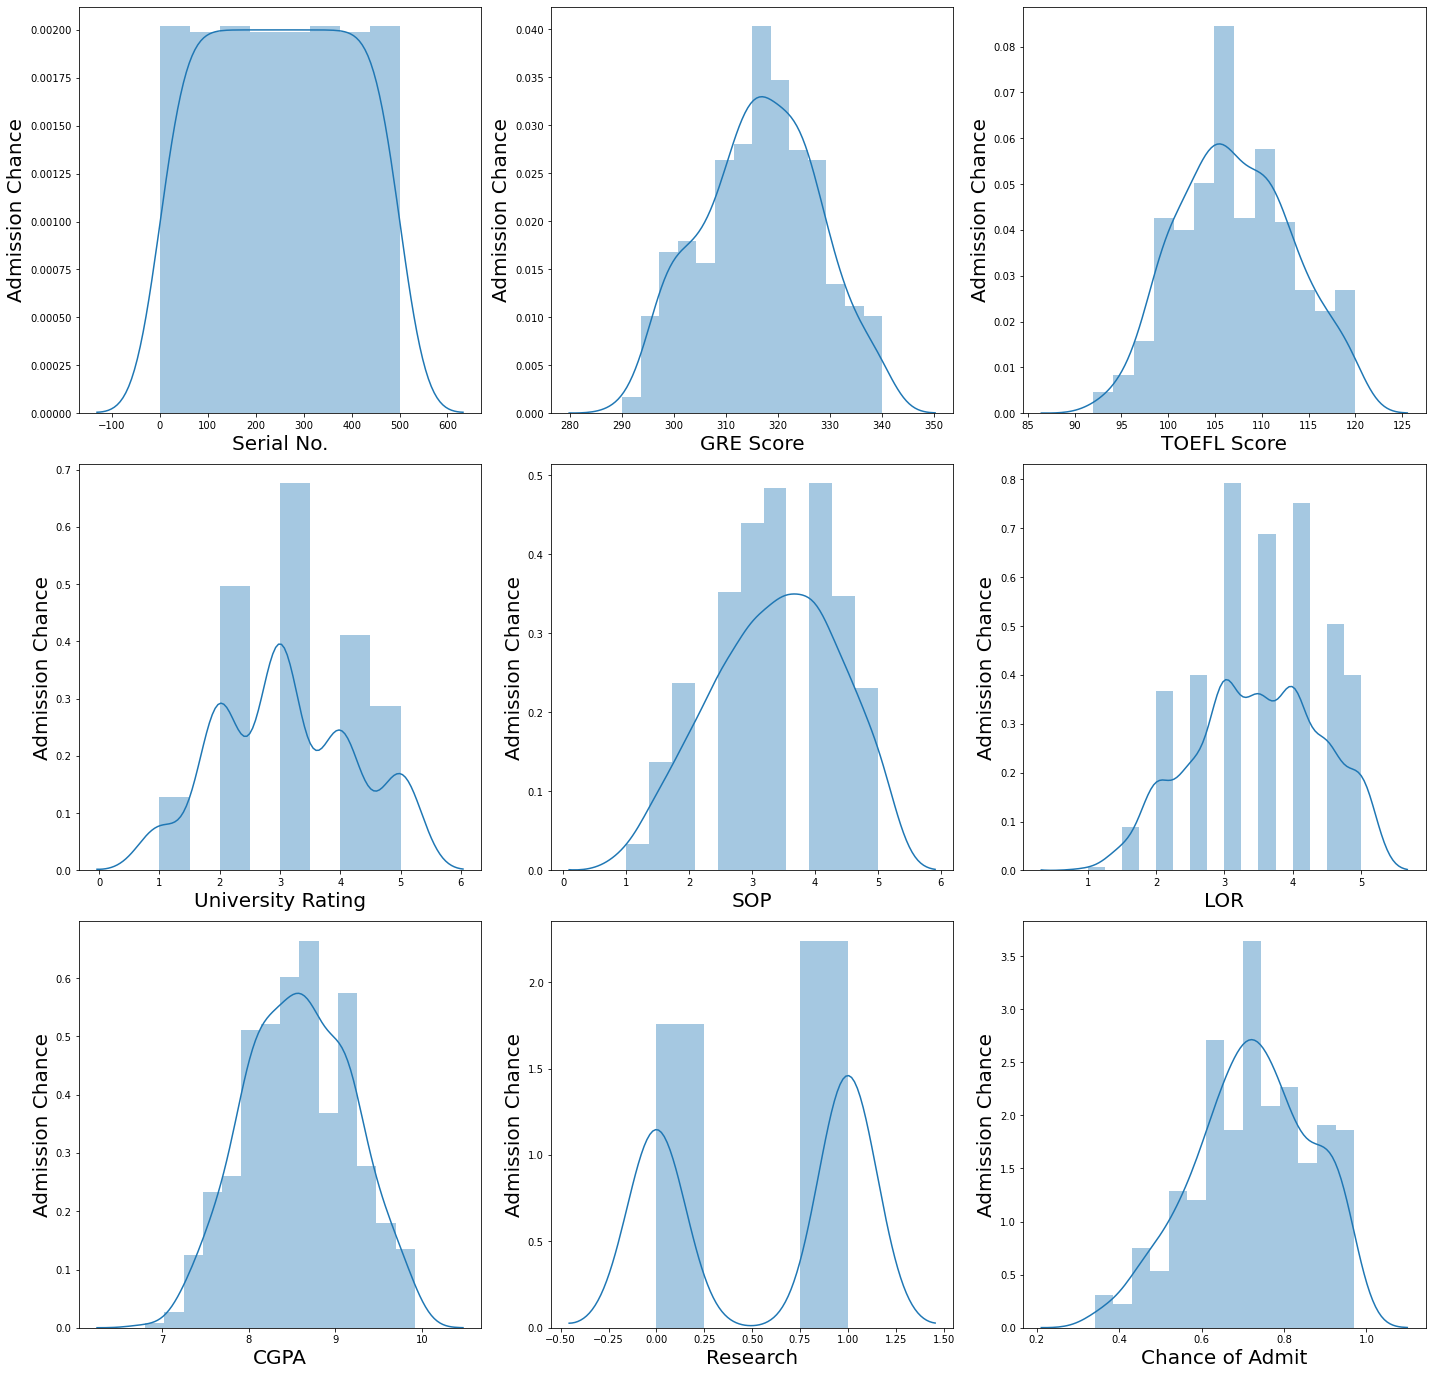

In [19]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white') ## main big size is occupide can say background
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Admission Chance',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [16]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [20]:
# droping the column which are not inportent fo model and creating X,Y 

X = data.drop(columns = ['Serial No.','Chance of Admit'])

Y = data['Chance of Admit']


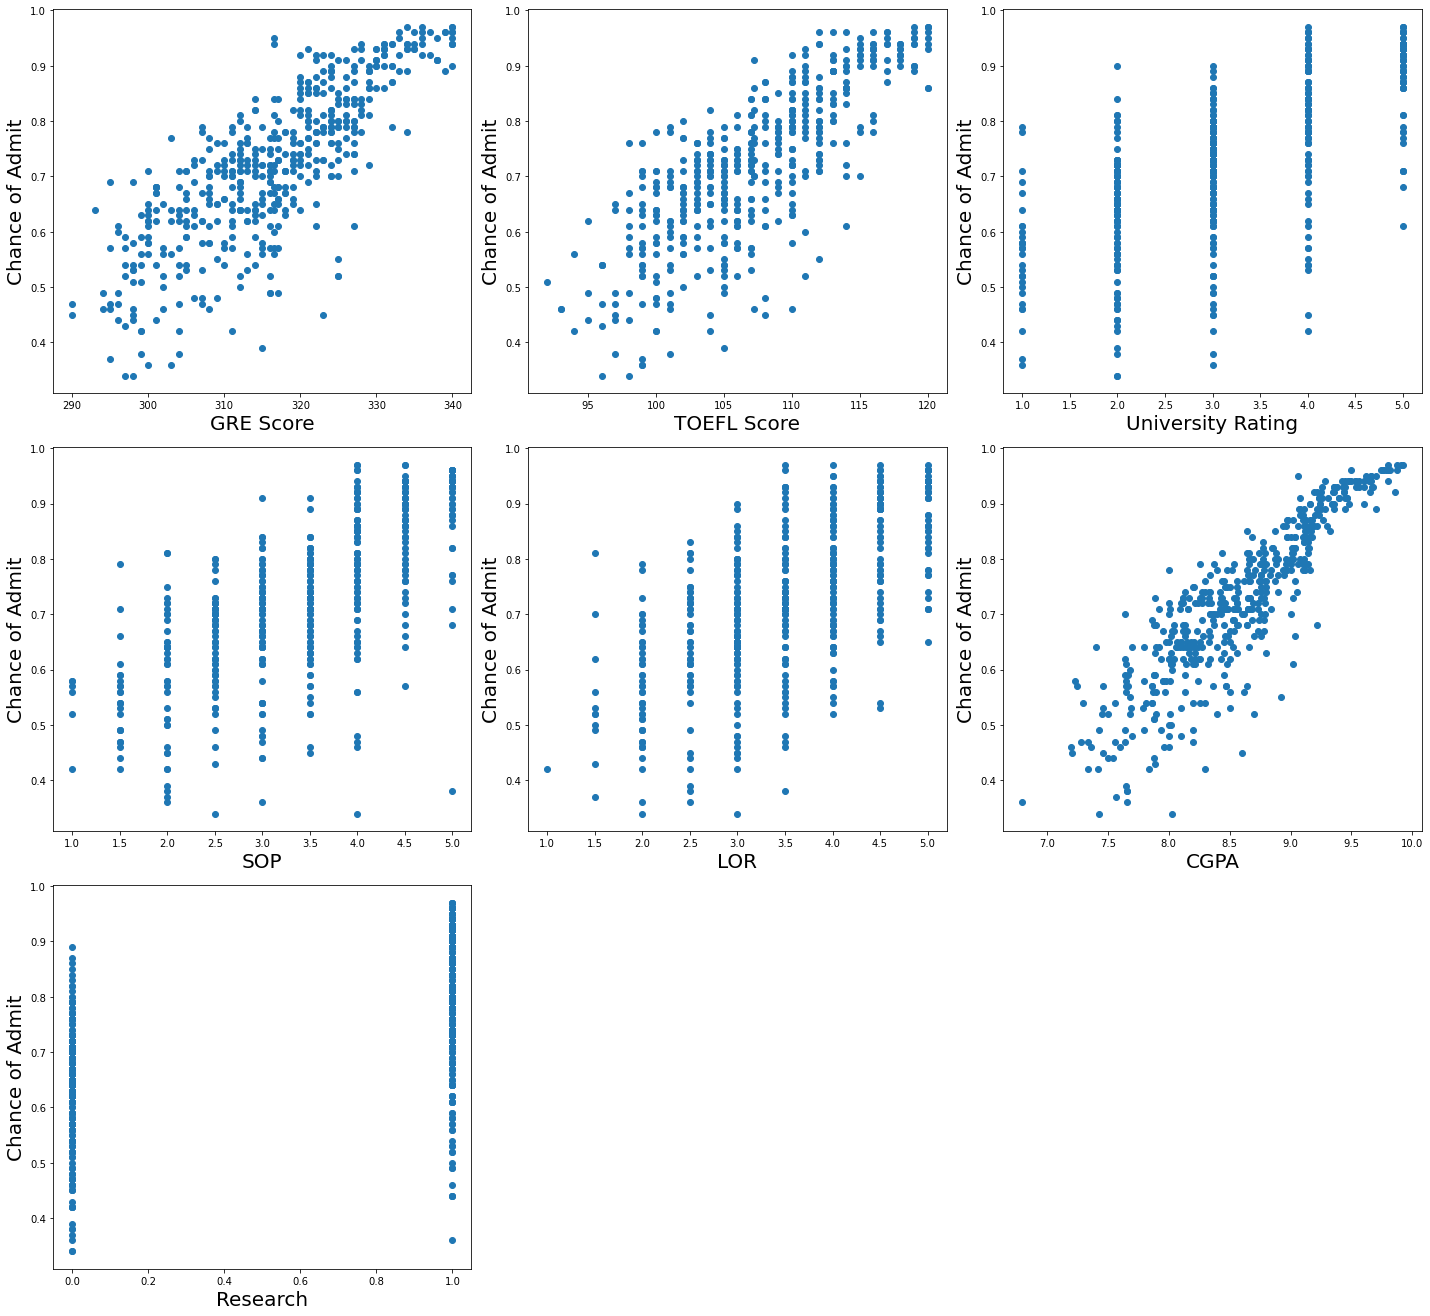

In [21]:
#Let's observe the relationship between independent variables and dependent variable

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [23]:
# standerdscaaler to scaleing our features/ variables

scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [24]:
#correlation check  between all the X variables using VIF => variance_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns


In [25]:
vif["VIF"]

0    4.152735
1    3.793345
2    2.517272
3    2.776393
4    2.037449
5    4.654369
6    1.459411
Name: VIF, dtype: float64

In [26]:
vif["Features"]

0            GRE Score
1          TOEFL Score
2    University Rating
3                  SOP
4                  LOR
5                 CGPA
6             Research
Name: Features, dtype: object

In [27]:
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go.

Great. Let's go ahead and use linear regression and see how good it fits our data. But first. let's split our data in train and test.

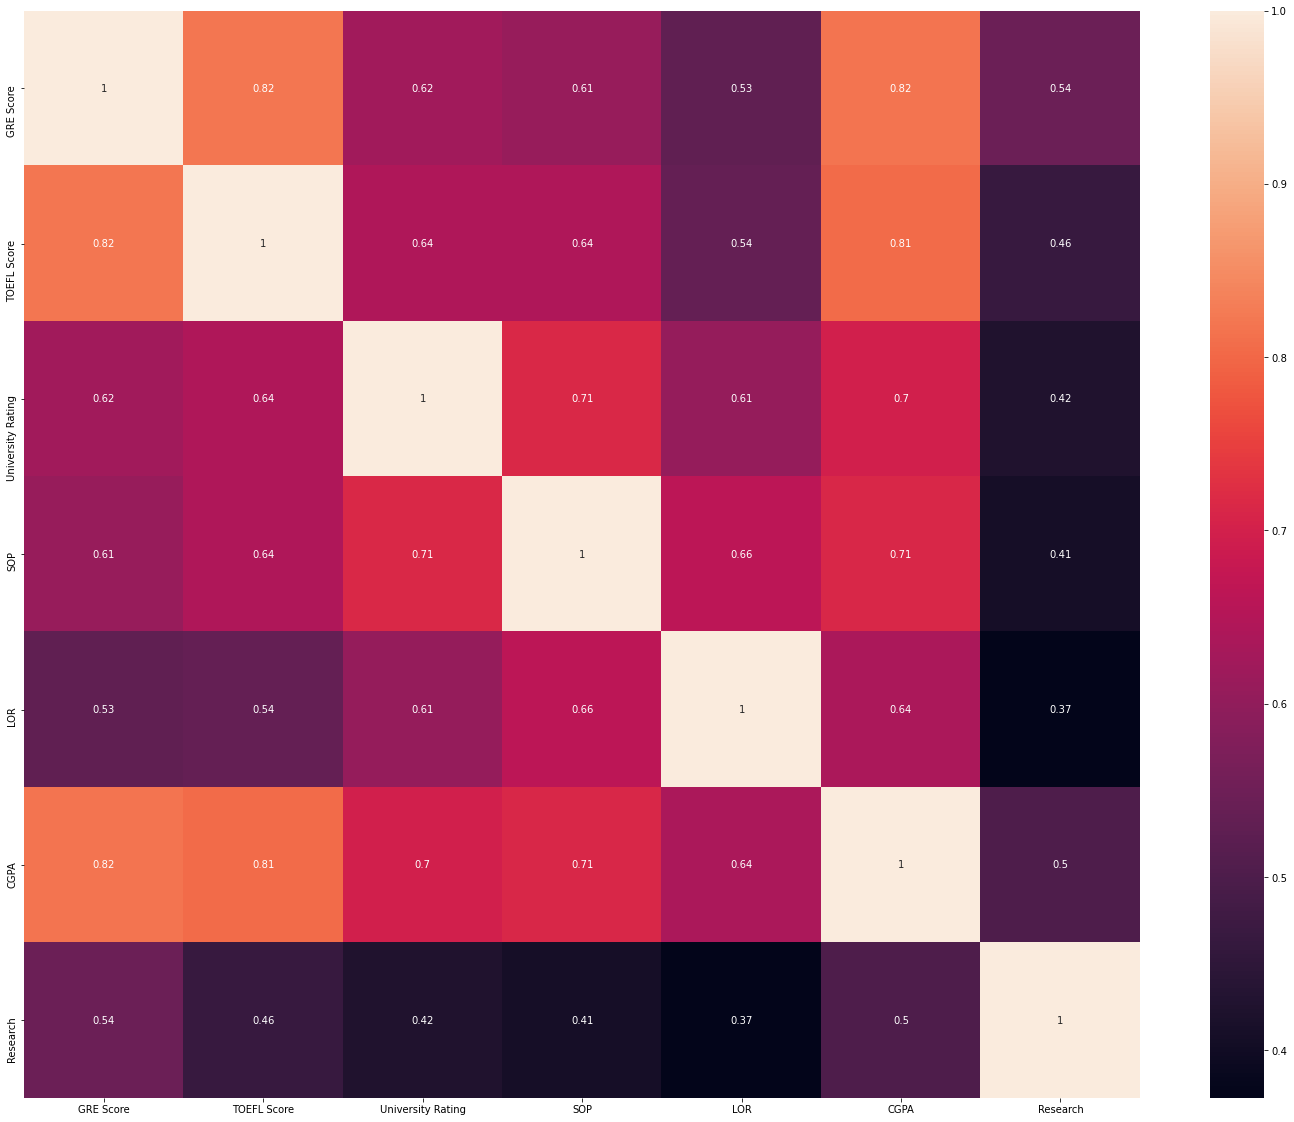

In [32]:
#heat map for correlation check
plt.figure(figsize = (25,20))
sns.heatmap(X.corr(),annot = True)

In [36]:
X.corr(method ="kendall")

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.647552,0.503274,0.470278,0.387085,0.642449,0.466216
TOEFL Score,0.647552,1.000000,0.513152,0.503228,0.398589,0.629237,0.394906
University Rating,0.503274,0.513152,1.000000,0.609550,0.496086,0.559632,0.392828
SOP,0.470278,0.503228,0.609550,1.000000,0.535641,0.558255,0.355953
LOR,0.387085,0.398589,0.496086,0.535641,1.000000,0.485466,0.328867
CGPA,0.642449,0.629237,0.559632,0.558255,0.485466,1.000000,0.417418
Research,0.466216,0.394906,0.392828,0.355953,0.328867,0.417418,1.000000


In [38]:
# createing testset and trainset from scaled data set

x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.25,random_state=1000) 

## random state could be used no affect on model

In [39]:
# createing Regressor

regression = LinearRegression()

In [40]:
# fit the training set ("x_train & y_train") into regressor


regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# saving the model to the local file system
filename = 'Add_Chance_finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [42]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.93927496])

In [47]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [48]:
adj_r2(x_train,y_train)

0.8222881162786738

In [49]:
regression.score(x_test,y_test)   # r2 score

0.8032478998185428

In [50]:
adj_r2(x_test,y_test)

0.7914764066452933

So it looks like our model r2 score is less on the test data.

**Let's see if our model is overfitting our training data.**

# Lasso Regularization

In [52]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [53]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

9.180107668492445e-06

In [54]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=9.180107668492445e-06, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
lasso_reg.score(x_test, y_test)

0.8032441716315567

our r2_score for test data (80.32%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

# Using Ridge regression

In [56]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([9.68869621, 4.71404502, 5.67404165, 3.51270527, 0.7431096 ,
       3.97739987, 2.19838224, 1.80602407, 8.85260055, 1.17742818,
       6.78099095, 7.23782459, 6.20932835, 8.70216599, 1.6816127 ,
       7.65337753, 6.75128829, 7.84505792, 3.80135073, 8.7345748 ,
       8.55682449, 6.34329979, 7.01714958, 1.02355888, 0.16826205,
       1.69390924, 7.31236601, 1.05256336, 4.28245216, 8.55234219,
       4.06581628, 5.65829567, 5.71021962, 3.71723193, 0.87045071,
       3.26660026, 6.95470408, 7.02330024, 7.77829234, 7.42967462,
       1.60821888, 7.07661907, 1.60655713, 6.98596994, 7.04005806,
       5.83722124, 7.10598755, 3.14055776, 9.45606085, 6.20455061]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [57]:
ridgecv.alpha_

0.16826205489920754

In [58]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.16826205489920754, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [59]:
ridge_model.score(x_test, y_test)

0.8033039040623544

 we got the same r2 square using Ridge regression as well same. So, it's safe to say there is no overfitting.

In [60]:
# Elastic net

In [61]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [62]:
elasticCV.alpha_

0.00031331810537435755

In [63]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [64]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.00031331810537435755, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [65]:
elasticnet_reg.score(x_test, y_test)

0.8031951728296616

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.